In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import math
import pandasql as ps
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
# Load your dataset and preprocess it as needed
data = pd.read_csv('TITANIC.csv')
ps.sqldf("""SELECT 
    *
    FROM data
""")

,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306.0,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,None,C,None,NaN,None
1306,1307.0,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,None,C,None,304.0,None
1307,1308.0,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,None,C,None,NaN,None
1308,1309.0,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,None,S,None,NaN,None


In [3]:
print(data["embarked"].drop_duplicates())
print(data["cabin"].drop_duplicates())

0        S
9        C
168    NaN
206      Q
Name: embarked, dtype: object
0            B5
1       C22 C26
5           E12
6            D7
7           A36
         ...   
1025       E121
1122      F E69
1131        E10
1187         G6
1249        F38
Name: cabin, Length: 187, dtype: object


In [4]:

df = data.copy()
df["sex"] = df["sex"].apply(lambda x: 1 if x == "male" else 0)

In [5]:
df.isnull().sum()
df["age"] = df["age"].fillna(np.mean(df["age"]))
df.isnull().sum()

PassengerId       1
pclass            1
survived          1
name              1
sex               0
age               0
sibsp             1
parch             1
ticket            1
fare              2
cabin          1015
embarked          3
boat            824
body           1189
home.dest       565
dtype: int64

In [6]:
df["embarked"] = data.copy()["embarked"]
df["embarked"].fillna("S", inplace=True)

In [7]:
def replace_embarked(x):
    if x == "S":
        return 0
    elif x == "C":
        return 1
    elif x == "Q":
        return 2

In [8]:
df["embarked"] = df["embarked"].apply(replace_embarked)
print(df["embarked"].head())

0    0
1    0
2    0
3    0
4    0
Name: embarked, dtype: int64


In [9]:
df["cabin"] = data.copy()["cabin"]
df["cabin"].fillna("G6", inplace=True)

In [10]:
set_val = set()
for i in df.index:
    set_val.add(df["cabin"][i][0])

In [11]:
set_val = sorted(set_val)
ind_lst = list(range(len(set_val)))
dic_cabin = {set_val[i]: ind_lst[i] for i in range(len(set_val))}
print(dic_cabin)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7}


In [12]:
def replace_cabin(x):
    return dic_cabin[x[0]]

df["cabin"] = df["cabin"].apply(replace_cabin)
print(df["cabin"].head())

df = df.drop(1309)
df

0    1
1    2
2    2
3    2
4    2
Name: cabin, dtype: int64


,PassengerId,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.000000,0.0,0.0,24160,211.3375,1,0,2,NaN,"St Louis, MO"
1,2.0,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.916700,1.0,2.0,113781,151.5500,2,0,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3.0,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.000000,1.0,2.0,113781,151.5500,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4.0,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1.0,2.0,113781,151.5500,2,0,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5.0,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1.0,2.0,113781,151.5500,2,0,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305.0,3.0,0.0,"Zabour, Miss. Hileni",0,14.500000,1.0,0.0,2665,14.4542,6,1,NaN,328.0,NaN
1305,1306.0,3.0,0.0,"Zabour, Miss. Thamine",0,29.881135,1.0,0.0,2665,14.4542,6,1,NaN,NaN,NaN
1306,1307.0,3.0,0.0,"Zakarian, Mr. Mapriededer",1,26.500000,0.0,0.0,2656,7.2250,6,1,NaN,304.0,NaN
1307,1308.0,3.0,0.0,"Zakarian, Mr. Ortin",1,27.000000,0.0,0.0,2670,7.2250,6,1,NaN,NaN,NaN


In [13]:

dff = df[df["pclass"] == 3]
df["fare"] = df["fare"].fillna(np.mean(dff["fare"]))
df.isnull().sum()

PassengerId       0
pclass            0
survived          0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              0
cabin             0
embarked          0
boat            823
body           1188
home.dest       564
dtype: int64

In [14]:
df = df.drop(["boat", "body", "home.dest"], axis=1)
df.isnull().sum()

PassengerId    0
pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin          0
embarked       0
dtype: int64

In [15]:
df = shuffle(df)
predicset = df.drop(["survived", "name", "ticket", "PassengerId"], axis=1).values
targetset = to_categorical(df["survived"])

In [16]:
n_col = predicset.shape[1]
print(f"target = \n{targetset}\n")
print(f"predictive features = \n{predicset[:15]}")
print(df.columns)
data.info() # the process is finally over.

target = 
[[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [1. 0.]]

predictive features = 
[[ 3.          1.         22.          0.          0.          7.25
   6.          0.        ]
 [ 2.          0.         28.          0.          0.         13.
   6.          0.        ]
 [ 2.          1.         36.          0.          0.         13.
   6.          0.        ]
 [ 3.          1.         32.          0.          0.          8.3625
   6.          0.        ]
 [ 3.          1.         36.          1.          1.         24.15
   6.          0.        ]
 [ 1.          1.         52.          1.          1.         79.65
   4.          0.        ]
 [ 3.          0.         29.88113451  0.          0.          7.8792
   6.          2.        ]
 [ 3.          1.         32.          0.          0.          8.05
   4.          0.        ]
 [ 3.          1.         19.          0.          0.          7.8958
   6.          0.        ]
 [ 3.          1.         29.88113451  1.        

In [17]:
predictors = predicset[:892]
target = targetset[:892]
print(len(predictors) == len(target))
print(predictors[:5])

True
[[ 3.      1.     22.      0.      0.      7.25    6.      0.    ]
 [ 2.      0.     28.      0.      0.     13.      6.      0.    ]
 [ 2.      1.     36.      0.      0.     13.      6.      0.    ]
 [ 3.      1.     32.      0.      0.      8.3625  6.      0.    ]
 [ 3.      1.     36.      1.      1.     24.15    6.      0.    ]]


In [18]:
# Seperate training data into train and validation
ratio = math.trunc(len(predictors)*0.8)
predictors_train = predictors[:ratio]
predictors_valid = predictors[ratio:]
target_train = target[:ratio]
target_valid = target[ratio:]
data.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   float64
 1   pclass       1309 non-null   float64
 2   survived     1309 non-null   float64
 3   name         1309 non-null   object 
 4   sex          1309 non-null   object 
 5   age          1046 non-null   float64
 6   sibsp        1309 non-null   float64
 7   parch        1309 non-null   float64
 8   ticket       1309 non-null   object 
 9   fare         1308 non-null   float64
 10  cabin        295 non-null    object 
 11  embarked     1307 non-null   object 
 12  boat         486 non-null    object 
 13  body         121 non-null    float64
 14  home.dest    745 non-null    object 
dtypes: float64(8), object(7)
memory usage: 153.6+ KB
Index(['PassengerId', 'pclass', 'survived', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embark

In [19]:
def normalize(df):
    norm_df = df.copy()
    for name in ['age', 'fare']:
        max_val = df[name].max()
        min_val = df[name].min()
        norm_df[name] = (norm_df[name] - min_val) / (max_val - min_val)
    return norm_df

In [20]:
df_norm = normalize(df.drop(["name", "ticket", "PassengerId"], axis=1))
predictors_norm_set = df_norm.drop(["survived"], axis=1).values
target_norm_set = to_categorical(df_norm["survived"])
predictors_norm = predictors_norm_set[:892]
target_norm = target_norm_set[:892]
predictors_norm_train = predictors_norm[:ratio]
predictors_norm_valid = predictors_norm[ratio:]
target_norm_train = target_norm[:ratio]
target_norm_valid = target_norm[ratio:]
print(len(predictors_norm_set))
print(len(predictors_norm))
print(predictors_norm_train.shape)
print(target_norm_train.shape)

1309
892
(713, 8)
(713, 2)


In [21]:
predictors_test = predicset[892:]
target_test = targetset[892:]
predictors_norm_test = predictors_norm_set[892:]
target_norm_test = target_norm_set[892:]
predictors_norm_test[:5]
print(predictors_norm_test.shape)
print(target_norm_test.shape)

(417, 8)
(417, 2)


In [22]:
def plot_loss(hist: dict, style="ggplot"):
    plt.style.use(style)
    plt.plot(hist['loss'], label='loss')
    plt.plot(hist["val_loss"], label="val loss")
    plt.title("Loss vs Val loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [23]:
def plot_accu(hist: dict, style="ggplot"):
    plt.style.use(style)
    plt.plot(hist['accuracy'], label='accuracy')
    plt.plot(hist["val_accuracy"], label="val accuracy")
    plt.title("Accuracy vs Val accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(loc="lower right")
    plt.show()

In [25]:
modelV1 = Sequential()
modelV1.add(Dense(32, activation="relu", input_shape=(n_col,)))
modelV1.add(Dense(32, activation="relu"))
modelV1.add(Dense(2, activation="softmax"))

In [28]:
modelV1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
histV1_1 = modelV1.fit(predictors, target, epochs=200)
test_loss, test_accu = modelV1.evaluate(predictors_test, target_test)
modelV1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
histV1_2 = modelV1.fit(predictors_train, target_train, validation_data=(predictors_valid, target_valid), epochs=200)


Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 0.4000 - accuracy: 0.8296
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8318
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8374
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3759 - accuracy: 0.8274
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8318
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8374
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8330
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3841 - accuracy: 0.8262
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.3881 - accuracy: 0.8307
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4005 - accuracy: 0.8217
Epoch 11/

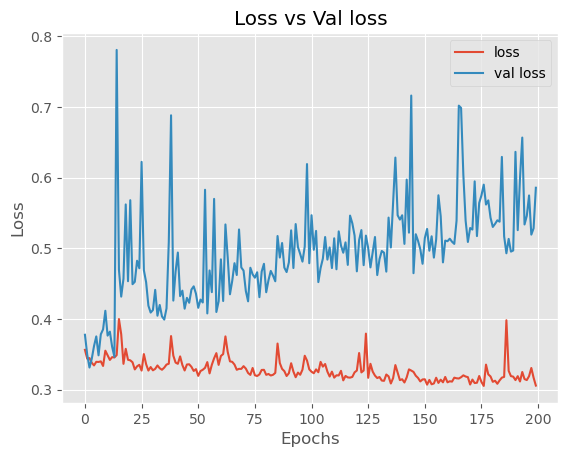

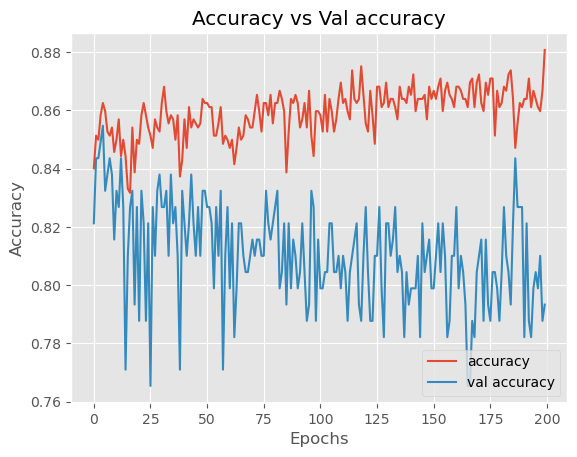

In [29]:
hist_dict_model_1 = histV1_2.history
plot_loss(hist_dict_model_1)
plot_accu(hist_dict_model_1)

In [30]:
test_loss, test_acc = modelV1.evaluate(predictors_test, target_test)
print(len(predictors_norm_valid) + len(predictors_norm_train))
print(len(predictors_norm_train))

14/14 [==============================] - 0s 2ms/step - loss: 0.7641 - accuracy: 0.8034
892
713


Epoch 1/200
23/23 [==============================] - 1s 8ms/step - loss: 8.7146 - accuracy: 0.4137 - val_loss: 5.6391 - val_accuracy: 0.4190
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 2.9842 - accuracy: 0.5624 - val_loss: 1.7670 - val_accuracy: 0.7598
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 1.5069 - accuracy: 0.7433 - val_loss: 1.1930 - val_accuracy: 0.7654
Epoch 4/200
23/23 [==============================] - 0s 3ms/step - loss: 1.0445 - accuracy: 0.7616 - val_loss: 0.9595 - val_accuracy: 0.7598
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 0.8501 - accuracy: 0.7686 - val_loss: 0.8172 - val_accuracy: 0.7709
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 0.7158 - accuracy: 0.7756 - val_loss: 0.7626 - val_accuracy: 0.7598
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.6482 - accuracy: 0.7784 - val_loss: 0.7230 - val_accuracy: 0.7486
Epoch 8/200
2

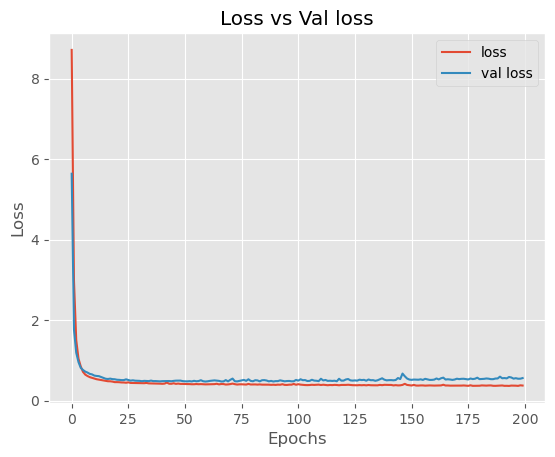

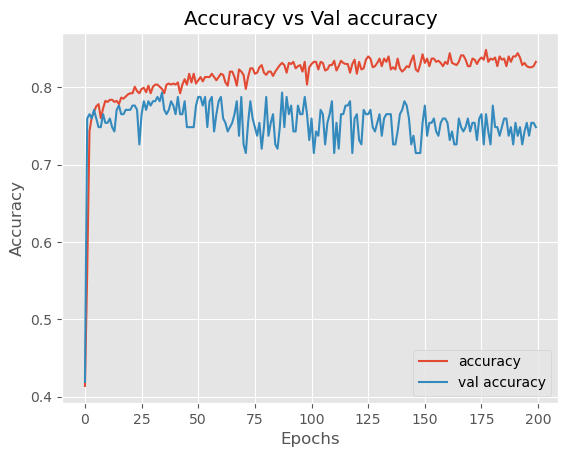

In [31]:
modelV1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
histV1_3 = modelV1.fit(predictors_norm_train, target_norm_train, validation_data=(predictors_norm_valid, target_norm_valid), epochs=200)


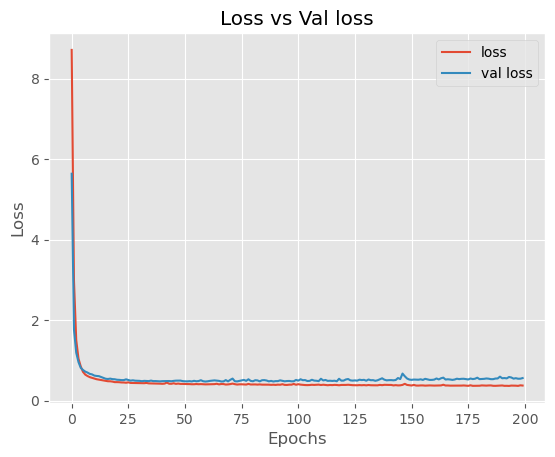

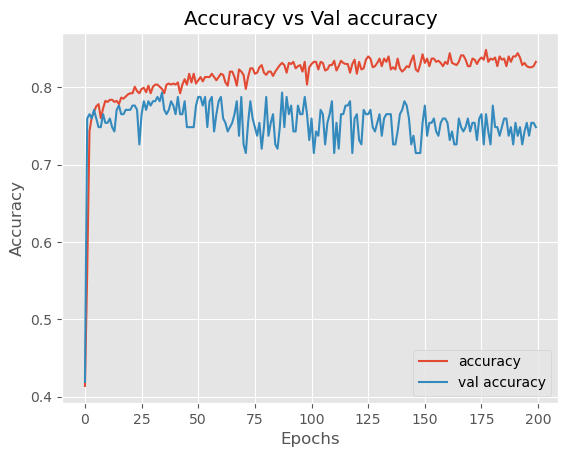

In [32]:
hist_dict_model_3 = histV1_3.history
plot_loss(hist_dict_model_3)
plot_accu(hist_dict_model_3)

In [33]:
test_loss, test_acc = modelV1.evaluate(predictors_norm_test, target_norm_test)
modelV2 = Sequential()
modelV2.add(Dense(32, activation="relu", input_shape=(n_col,)))
modelV2.add(Dropout(0.5))


14/14 [==============================] - 0s 3ms/step - loss: 0.5367 - accuracy: 0.8153


In [34]:
modelV2.add(Dense(32, activation="relu"))
modelV2.add(Dropout(0.5))

modelV2.add(Dense(2, activation="softmax"))

Epoch 1/200
23/23 [==============================] - 1s 8ms/step - loss: 2.8530 - accuracy: 0.5905 - val_loss: 1.0153 - val_accuracy: 0.7095
Epoch 2/200
23/23 [==============================] - 0s 4ms/step - loss: 2.4390 - accuracy: 0.5344 - val_loss: 1.1050 - val_accuracy: 0.6927
Epoch 3/200
23/23 [==============================] - 0s 4ms/step - loss: 1.7856 - accuracy: 0.5989 - val_loss: 1.0861 - val_accuracy: 0.7039
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 1.5481 - accuracy: 0.5638 - val_loss: 0.9742 - val_accuracy: 0.7039
Epoch 5/200
23/23 [==============================] - 0s 4ms/step - loss: 1.2267 - accuracy: 0.6017 - val_loss: 0.8477 - val_accuracy: 0.7263
Epoch 6/200
23/23 [==============================] - 0s 4ms/step - loss: 1.2030 - accuracy: 0.5680 - val_loss: 0.8289 - val_accuracy: 0.7207
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 1.0852 - accuracy: 0.5694 - val_loss: 0.8380 - val_accuracy: 0.7151
Epoch 8/200
2

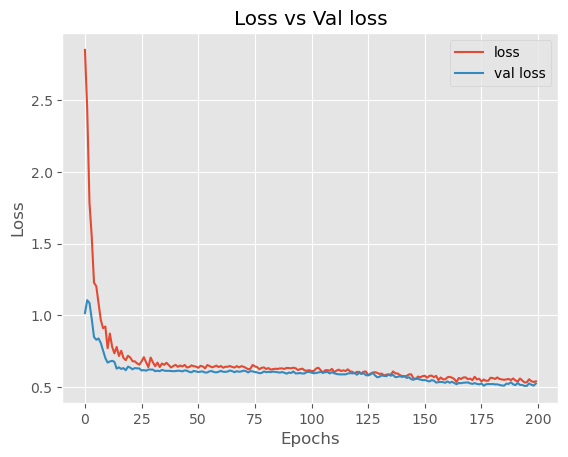

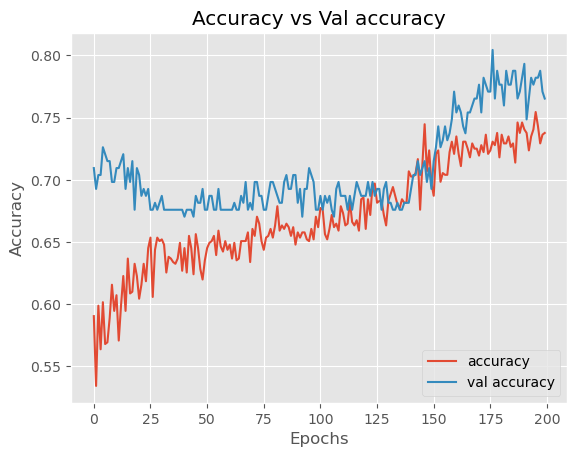

14/14 [==============================] - 0s 3ms/step - loss: 0.5086 - accuracy: 0.7842


In [35]:
modelV2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
histV2_1 = modelV2.fit(predictors_train, target_train, validation_data=(predictors_valid, target_valid), epochs=200, verbose=1)


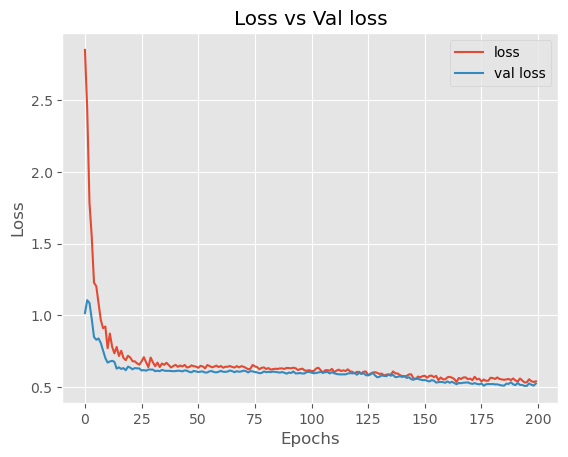

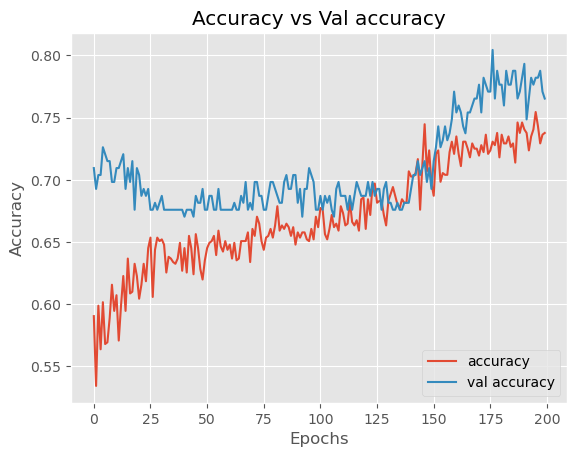

14/14 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7842


In [36]:
dict_histV2_1 = histV2_1.history
plot_loss(dict_histV2_1)
plot_accu(dict_histV2_1)
test_loss, test_acc = modelV2.evaluate(predictors_test, target_test)
modelV3 = Sequential()
modelV3.add(Dense(32, activation="relu", input_shape=(n_col,)))
modelV3.add(BatchNormalization())
modelV3.add(Dropout(0.5))

In [37]:
modelV3.add(Dense(32, activation="relu"))
modelV3.add(BatchNormalization())
modelV3.add(Dropout(0.5))



In [38]:
modelV3.add(Dense(2, activation="softmax"))
modelV3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
histV3_1 = modelV3.fit(predictors_train, target_train, validation_data=(predictors_valid, target_valid), epochs=200, verbose=1)

Epoch 1/200
23/23 [==============================] - 1s 10ms/step - loss: 1.1163 - accuracy: 0.5119 - val_loss: 1.1534 - val_accuracy: 0.3240
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.9864 - accuracy: 0.5302 - val_loss: 0.9115 - val_accuracy: 0.6536
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.8703 - accuracy: 0.5568 - val_loss: 0.7963 - val_accuracy: 0.6592
Epoch 4/200
23/23 [==============================] - 0s 4ms/step - loss: 0.9021 - accuracy: 0.5540 - val_loss: 0.7076 - val_accuracy: 0.6648
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.7805 - accuracy: 0.6073 - val_loss: 0.7006 - val_accuracy: 0.6648
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.7690 - accuracy: 0.6396 - val_loss: 0.6916 - val_accuracy: 0.6592
Epoch 7/200
23/23 [==============================] - 0s 4ms/step - loss: 0.7886 - accuracy: 0.5933 - val_loss: 0.6832 - val_accuracy: 0.6592
Epoch 8/200
